<a href="https://colab.research.google.com/github/cyxstudio/Detours/blob/master/MNIST_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import all modules
import numpy as np
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [0]:
#ensure that we have the same output, use this random seed
np.random.seed(7)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


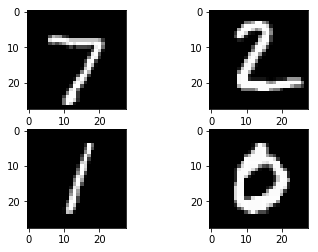

In [91]:
#use the dataset MNIST from keras gives out two tuples for training and test
(X_train,y_train), (X_test, y_test) = mnist.load_data()


#check the output
plt.subplot(221)
plt.imshow(X_train[0], cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap = plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap = plt.get_cmap('gray'))



plt.subplot(221)
plt.imshow(X_test[0], cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_test[1], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_test[2], cmap = plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_test[3], cmap = plt.get_cmap('gray'))


In [89]:
X_train.shape

(60000, 28, 28)

In [0]:
#flatten the pixels into 784 inputs instead of 28x28 pixels
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
#do batch normalization as part of optimization
X_train = X_train/255
X_test = X_test / 255

In [0]:
#oneshot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]  # or you can do y_train.shape[1]

In [0]:
#define baseline model
def baseline_model(input_units,input_dim, activation, output_units, optimizer):
  #this is where yu use the keras models
  #we will build with one hidden layer as the baseline model
  model = Sequential()
  model.add(Dense(input_units, input_dim = input_dim, kernel_initializer="normal", activation=activation))
  mode.add(Dense(20, kernel_initializer="normal", activation="relu"))
  model.add(Dense(output_units, kernel_initializer="normal", activation="softmax"))
  
  #comple the model
  model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
  return model


In [83]:
#build the model

model = baseline_model(num_pixels, num_pixels, 'relu', num_classes, 'adam')
#fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size=100, verbose = 2)

#evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

print("baseline error : %.2f%%" % (100- scores[1]*100))

NameError: ignored

In [87]:
#lets try to predict
np.argmax(model.predict(X_test)[2])

1

In [85]:
y_train.shape

(60000, 10)